In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("diabetic_data.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
print(df.shape)
print(df.info)

(101766, 50)
<bound method DataFrame.info of         encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_

In [5]:
df['patient_nbr'].value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [7]:
df = df.replace("?",np.nan)

In [8]:
df.isnull().sum()[df.isnull().sum()>1]


race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64

In [9]:
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']

In [10]:
df.drop(features_drop_list, axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101745 non-null  object
 14  diag

In [12]:
df['race'] = df['race'].fillna('Other')

In [13]:
df['race'].isnull().sum()

0

In [14]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [15]:
df['gender']=df['gender'].replace('Unknown/Invalid',np.NaN)
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [16]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

# Importing IDS MAPPING

In [17]:
map=pd.read_csv('IDS_mapping.csv')

In [18]:
df['admission_type_id']=df['admission_type_id'].replace({1:'Emergency',2:'Urgent',3:'elective',4:'New Born',5:'Not mapped',6:'NULL',7:'Trauma Centre',8:'Not mapped'})
print(df['admission_type_id'].value_counts())

admission_type_id
Emergency        53990
elective         18869
Urgent           18480
NULL              5291
Not mapped        5105
Trauma Centre       21
New Born            10
Name: count, dtype: int64


In [19]:
print(df['discharge_disposition_id'].value_counts())

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64


In [20]:
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({1:'Discharged',
2:'transferred',
3:'transferred',
4:'transferred',
5:'transferred',
6:'transferred',
7:'Left AMA',
8:'transferred',
9:'Admitted as an inpatient to this hospital',
10:'Neonate discharged',
11:'Expired',
12:'Still patient or expected to return for outpatient services',
13:'Hospice',
14:'Hospice ',
15:'transferred',
16:'Discharged',
17:'transferred',
18:'Not Mapped',
19:'Expired',
20:'Expired',
21:'Expired',
22:'Discharged',
23:'transferred',
24:'transferred',
25:'Not Mapped',
26:'Not Mapped',
30:'transferred',
27:'transferred',
28:'transferred',
29:'transferred'})

In [21]:
df['discharge_disposition_id'].unique()


array(['Not Mapped', 'Discharged', 'transferred', 'Expired', 'Left AMA',
       'Neonate discharged', 'Hospice ', 'Hospice',
       'Still patient or expected to return for outpatient services',
       'Admitted as an inpatient to this hospital'], dtype=object)

In [22]:
df['discharge_disposition_id'].value_counts()


discharge_disposition_id
Discharged                                                     62238
transferred                                                    31772
Not Mapped                                                      4680
Expired                                                         1652
Left AMA                                                         623
Hospice                                                          399
Hospice                                                          372
Admitted as an inpatient to this hospital                         21
Neonate discharged                                                 6
Still patient or expected to return for outpatient services        3
Name: count, dtype: int64

In [23]:
df['admission_source_id']=df['admission_source_id'].replace	({
	1	: 'Physician Referral',
	2	:'Clinic Referral',
	3	:'HMO Referral',
	4	:'Transfer',
	5	 :'Transfer',
	6	 :'Transfer',
	7	 :'Emergency Room',
	8	 :'Court/Law Enforcement',
	9	 :'Not Mapped',
	10	 :'Transfer',
	11	:'Normal Delivery',
	12	 :'Premature Delivery',
	13	 :'Sick Baby',
	14	 :'Extramural Birth',
	15	:'Not Available',
	17	:'NULL',
	18	 :'Transfer',
	19	:'Readmission to Same Home Health Agency',
	20	: 'Not Mapped',
	21	:'Not Mapped',
	22	: 'Transfer',
	23	 :'Born inside this hospital',
	24	 :'Born outside this hospital',
	25	 :'Transfer',
	26	:'Transfer'})

print(df['admission_source_id'].value_counts())

admission_source_id
Emergency Room           57494
Physician Referral       29565
NULL                      6781
Transfer                  6328
Clinic Referral           1104
Not Mapped                 286
HMO Referral               187
Court/Law Enforcement       16
Extramural Birth             2
Normal Delivery              2
Sick Baby                    1
Name: count, dtype: int64


In [24]:
df.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
glimepiride                     0
glipizide                       0
glyburide                       0
pioglitazone                    0
rosiglitazone                   0
insulin                         0
change                          0
diabetesMed                     0
readmitted                      0
dtype: int64

In [25]:
df.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [26]:
df.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
glimepiride                     0
glipizide                       0
glyburide                       0
pioglitazone                    0
rosiglitazone                   0
insulin                         0
change                          0
diabetesMed                     0
readmitted                      0
dtype: int64

In [27]:
df['max_glu_serum']=df['max_glu_serum'].fillna(df['max_glu_serum'].mode()[0])

In [28]:
df['A1Cresult']=df['A1Cresult'].fillna(df['A1Cresult'].mode()[0])

In [29]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [30]:
df['A1Cresult'].value_counts()

A1Cresult
>8      92964
Norm     4990
>7       3812
Name: count, dtype: int64

In [31]:
 df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [32]:
df.readmitted = df.readmitted.replace({"NO":0, "<30":0, ">30":1})

In [33]:
df.readmitted.value_counts()

readmitted
0    66221
1    35545
Name: count, dtype: int64

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


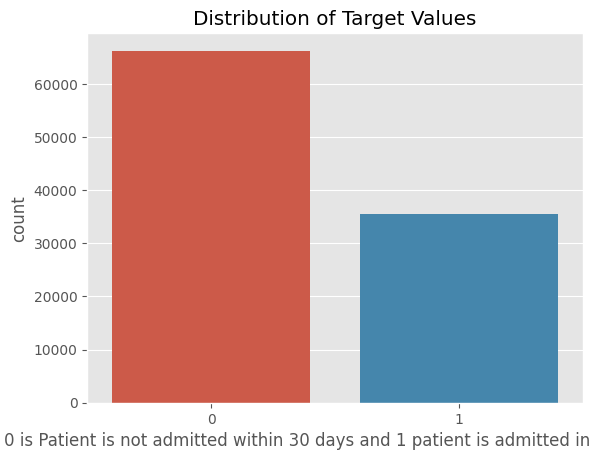

In [34]:

sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.xlabel('0 is Patient is not admitted within 30 days and 1 patient is admitted in 30 days ')
plt.show()



C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


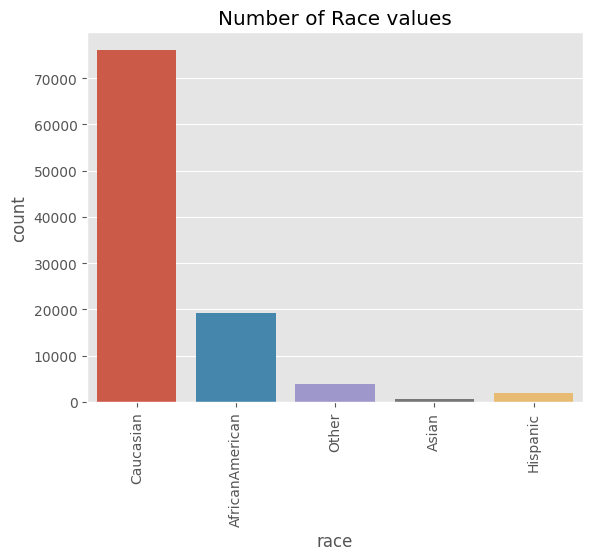

Proportion of Race
race
Caucasian          74.778413
AfricanAmerican    18.876639
Other               3.713421
Hispanic            2.001651
Asian               0.629876
Name: proportion, dtype: float64


In [35]:
sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

In [36]:
df.race = df.race.replace({"Caucasian":0,
                         "AfricanAmerican":1,
                         "Hispanic":2,
                         "Asian":3,
                         "Other":4})
df['race'].value_counts()

race
0    76099
1    19210
4     3779
2     2037
3      641
Name: count, dtype: int64

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

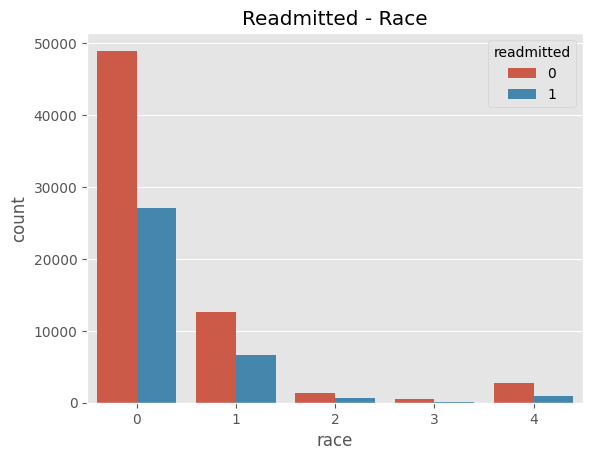

In [37]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

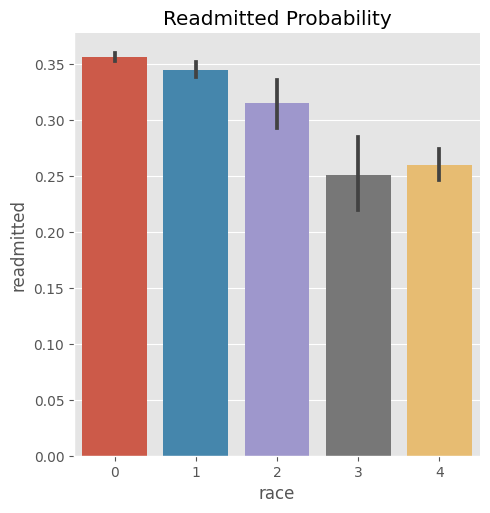

In [38]:
sns.catplot(x = "race", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


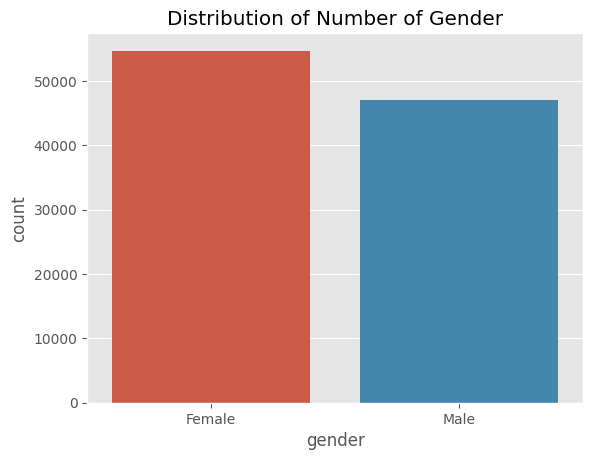

Proportions of Race Value
gender
Female    0.537616
Male      0.462384
Name: proportion, dtype: float64


gender
Female    54711
Male      47055
Name: count, dtype: int64


In [39]:
sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(df.gender.value_counts(normalize = True))
print("\n")
print(df.gender.value_counts())

In [40]:
df['gender'] = df['gender'].replace('Male',1)
df['gender'] = df['gender'].replace('Female', 0)
df.gender.value_counts()

gender
0    54711
1    47055
Name: count, dtype: int64

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

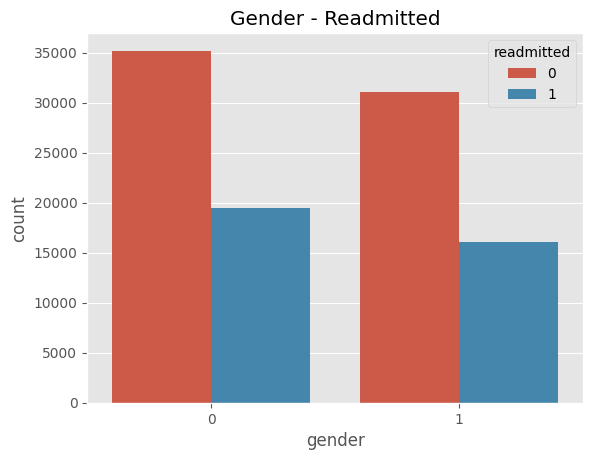

In [41]:
sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


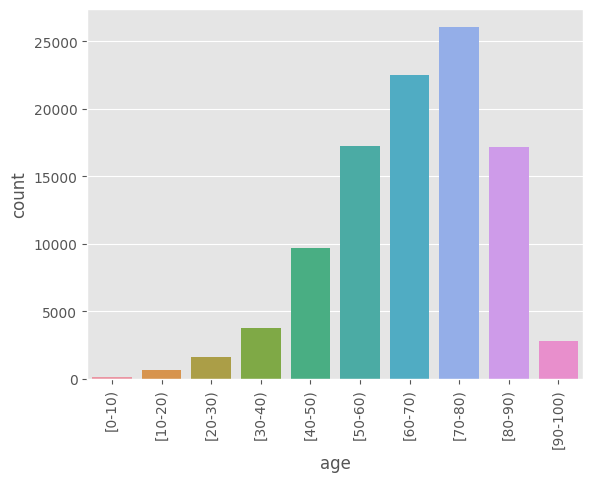

In [42]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

In [43]:
df['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: age
Non-Null Count   Dtype 
--------------   ----- 
101766 non-null  object
dtypes: object(1)
memory usage: 795.2+ KB


In [44]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})
df['age'].value_counts()

age
75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


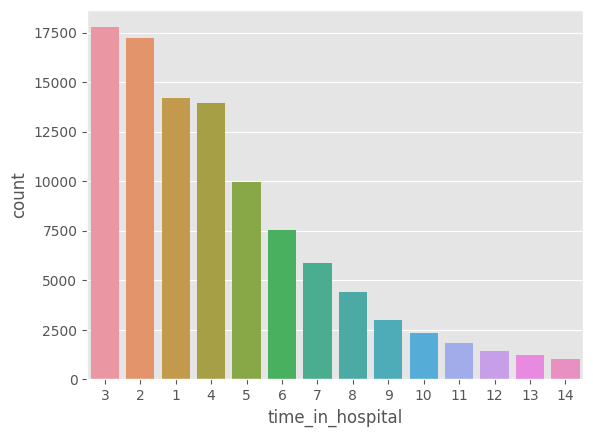

time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


In [45]:
sns.countplot(x="time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

print(df.time_in_hospital.value_counts())

In [46]:
df['change'].unique()

array(['No', 'Ch'], dtype=object)

In [47]:
df['change']=df['change'].replace({'No':0,'Ch':1})

In [48]:
df['change'].unique()

array([0, 1], dtype=int64)

In [49]:
df['diabetesMed']=df['diabetesMed'].replace({'Yes':1,'No':0})

# Testing and Applying model

In [50]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score


from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
import math

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [51]:
from sklearn.model_selection import train_test_split

Y = df['readmitted']
X = df.drop(['readmitted'], axis =1)
X = pd.get_dummies(X)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .35, 
                                                random_state = 10, stratify = Y)
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (66147, 75) (35619, 75)


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,f1_score,recall_score,precision_score

logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

print('precision\n',precision_score(Ytest,Ylog)) 
print('F1 Score\n',f1_score(Ytest,Ylog))
print('recall\n',recall_score(Ytest,Ylog))
from sklearn.metrics import confusion_matrix
print('The confusion matrix for Logistic Regression is\n',confusion_matrix(Ytest, Ylog))


from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog))

C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 The accuracy of the Logistic regression model: 0.6527695892641567
precision
 0.5261648745519714
F1 Score
 0.10610002891008963
recall
 0.05899847279157624
The confusion matrix for Logistic Regression is
 [[22517   661]
 [11707   734]]
              precision    recall  f1-score   support

           0       0.66      0.97      0.78     23178
           1       0.53      0.06      0.11     12441

    accuracy                           0.65     35619
   macro avg       0.59      0.52      0.45     35619
weighted avg       0.61      0.65      0.55     35619



# Decision Tree

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import roc_curve,f1_score,recall_score,precision_score

DTC = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=10)
DTC.fit(Xtrain, Ytrain)

ypreddt = DTC.predict(Xtest)
ypreddt

print( "Accuracy is ", accuracy_score(Ytest,ypreddt))

from sklearn.metrics import classification_report
print(classification_report(Ytest, ypreddt))


print('precision',precision_score(Ytest,ypreddt)) 
print('F1 Score',f1_score(Ytest,ypreddt))
print('recall',recall_score(Ytest,ypreddt))

Accuracy is  0.6507201212835846
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     23178
           1       0.00      0.00      0.00     12441

    accuracy                           0.65     35619
   macro avg       0.33      0.50      0.39     35619
weighted avg       0.42      0.65      0.51     35619

precision 0.0


C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

F1 Score 0.0
recall 0.0


# Random Forest

In [54]:
from sklearn.pipeline import Pipeline
from warnings import filterwarnings
from sklearn.metrics import roc_curve,f1_score,recall_score,precision_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import hamming_loss


In [55]:
pipe=Pipeline((
    ('pt',PowerTransformer()),
    ('rf',RandomForestClassifier(random_state=10)),
))
pipe.fit(Xtrain,Ytrain)
print('Training Accuracy',pipe.score(Xtrain,Ytrain))
print('Testing Accuracy',pipe.score(Xtest,Ytest))
pred_train=pipe.predict(Xtrain)
pred_test=pipe.predict(Xtest)
print('Prediction of train data is ',pred_train)
print('Prediction of test data is ',pred_test)

print('precision',precision_score(Ytest,pred_test))
print('F1 Score',f1_score(Ytest,pred_test))
print('recall',recall_score(Ytest,pred_test))

hamming_loss_train = hamming_loss(Ytrain, pred_train)
hamming_loss_test = hamming_loss(Ytest, pred_test)
print('Hamming Loss on Train Data:', hamming_loss_train)
print('Hamming Loss on Test Data:', hamming_loss_test)

from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(Ytest, pred_test))


Training Accuracy 0.9999395286256368
Testing Accuracy 0.6515623683988883
Prediction of train data is  [1 0 0 ... 1 0 0]
Prediction of test data is  [0 0 0 ... 0 0 1]
precision 0.50271444082519
F1 Score 0.3092335949240274
recall 0.22329394743187847
Hamming Loss on Train Data: 6.047137436316084e-05
Hamming Loss on Test Data: 0.34843763160111174
classification report on prediction of test data
               precision    recall  f1-score   support

           0       0.68      0.88      0.77     23178
           1       0.50      0.22      0.31     12441

    accuracy                           0.65     35619
   macro avg       0.59      0.55      0.54     35619
weighted avg       0.62      0.65      0.61     35619



# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(Xtrain,Ytrain)
nb1=nb.predict(Xtest)
nb1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Ytest, nb1)
precision = precision_score(Ytest, nb1)
recall = recall_score(Ytest, nb1)
f1 = f1_score(Ytest, nb1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(Ytest, nb1))

Accuracy: 0.37850585361745137
Precision: 0.3580131208997188
Recall: 0.9825576722128446
F1-score: 0.5248041214983363
classification report on prediction of test data
               precision    recall  f1-score   support

           0       0.85      0.05      0.10     23178
           1       0.36      0.98      0.52     12441

    accuracy                           0.38     35619
   macro avg       0.61      0.52      0.31     35619
weighted avg       0.68      0.38      0.25     35619



# Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,
                               max_depth=3,random_state=50)
gbc.fit(Xtrain,Ytrain)
gbc1=gbc.predict(Xtest)
gbc1
gbc_accuracy=accuracy_score(Ytest,gbc1)
print("Accuracy:", gbc_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, gbc1))


from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(Ytest, gbc1))

print('precision',precision_score(Ytest,gbc1))
print('F1 Score',f1_score(Ytest,gbc1))
print('recall',recall_score(Ytest,gbc1))

Accuracy: 0.6533591622448693
[[20399  2779]
 [ 9568  2873]]
classification report on prediction of test data
               precision    recall  f1-score   support

           0       0.68      0.88      0.77     23178
           1       0.51      0.23      0.32     12441

    accuracy                           0.65     35619
   macro avg       0.59      0.56      0.54     35619
weighted avg       0.62      0.65      0.61     35619

precision 0.5083156404812456
F1 Score 0.3175813850660476
recall 0.2309299895506792


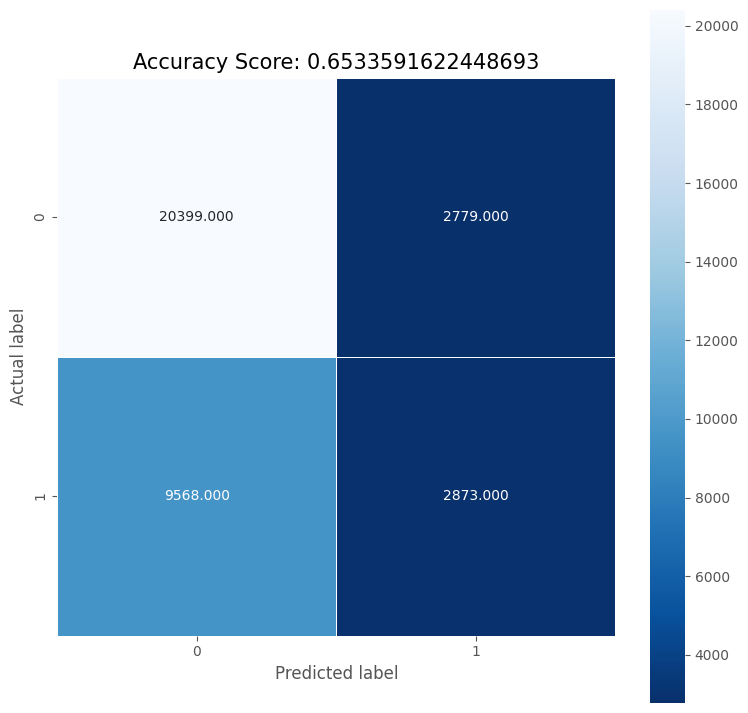

In [58]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, gbc1), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(gbc.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

# applying smote 

In [60]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred1 = model.predict(X_test)

print('Prediction of test data is ',y_pred1)

print('precision',precision_score(y_test,y_pred1))
print('F1 Score',f1_score(y_test,y_pred1))
print('recall',recall_score(y_test,y_pred1))

hamming_loss_test = hamming_loss(y_test,y_pred1)
print('Hamming Loss on Test Data:', hamming_loss_test)

from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(y_test,y_pred1))

Prediction of test data is  [0 0 0 ... 1 0 0]
precision 0.4603844350679794
F1 Score 0.34507599051216725
recall 0.2759589714767458
Hamming Loss on Test Data: 0.36626707281124105
classification report on prediction of test data
               precision    recall  f1-score   support

           0       0.68      0.83      0.75     13237
           1       0.46      0.28      0.35      7117

    accuracy                           0.63     20354
   macro avg       0.57      0.55      0.55     20354
weighted avg       0.60      0.63      0.61     20354



In [74]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_resampled,y_resampled)
nb1=nb.predict(X_test)
nb1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, nb1)
precision = precision_score(y_test, nb1)
recall = recall_score(y_test, nb1)
f1 = f1_score(y_test, nb1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(y_test, nb1))

Accuracy: 0.39466443942222657
Precision: 0.3586176918061291
Recall: 0.9273570324574961
F1-score: 0.5172211120253909
classification report on prediction of test data
               precision    recall  f1-score   support

           0       0.73      0.11      0.19     13237
           1       0.36      0.93      0.52      7117

    accuracy                           0.39     20354
   macro avg       0.55      0.52      0.35     20354
weighted avg       0.60      0.39      0.30     20354



In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,
                               max_depth=3,random_state=50)
gbc.fit(X_resampled,y_resampled)
gbc1=gbc.predict(X_test)
gbc1
gbc_accuracy=accuracy_score(y_test,gbc1)
print("Accuracy:", gbc_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, gbc1))


from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(y_test, gbc1))

print('precision',precision_score(y_test,gbc1))
print('F1 Score',f1_score(y_test,gbc1))
print('recall',recall_score(y_test,gbc1))

Accuracy: 0.6496020438243097
[[11236  2001]
 [ 5131  1986]]
classification report on prediction of test data
               precision    recall  f1-score   support

           0       0.69      0.85      0.76     13237
           1       0.50      0.28      0.36      7117

    accuracy                           0.65     20354
   macro avg       0.59      0.56      0.56     20354
weighted avg       0.62      0.65      0.62     20354

precision 0.49811888638073737
F1 Score 0.3577089337175792
recall 0.27905016158493745


In [64]:
# tuning model parameter

In [65]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [68]:
model = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)



KeyboardInterrupt



In [ ]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_




y_pred2 = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(y_pred2)
print(accuracy)
from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(y_test,y_pred2))

In [70]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
acc

accuracy = accuracy_score(y_test, y_pred)

ValueError: Invalid parameter 'n_estimators' for estimator DecisionTreeClassifier(random_state=42). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [73]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = DecisionTreeClassifier(**best_params, random_state=42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print(accuracy)
print('precision',precision_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))

from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(y_test,y_pred))

0.6527955193082441
precision 0.5118371212121212
F1 Score 0.2342615668003034
recall 0.15188984122523536
classification report on prediction of test data
               precision    recall  f1-score   support

           0       0.67      0.92      0.78     13237
           1       0.51      0.15      0.23      7117

    accuracy                           0.65     20354
   macro avg       0.59      0.54      0.50     20354
weighted avg       0.61      0.65      0.59     20354



# Final Model

In [76]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over_sampling = SMOTE(sampling_strategy='auto', random_state=42)
under_sampling = RandomUnderSampler(sampling_strategy='auto', random_state=42)

steps = [
    ('o', over_sampling),  
    ('u', under_sampling)  
]

pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)


In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(nb_classifier, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_resampled, y_resampled)

best_nb_classifier = grid_search.best_estimator_

best_nb_classifier.fit(X_resampled, y_resampled)


GaussianNB(var_smoothing=1e-05)

In [87]:
decision_scores = best_nb_classifier.predict_log_proba(X_test)

new_threshold = -4.20

y_pred_new = (decision_scores[:, 1] >= new_threshold).astype(int)


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)
conf_matrix = confusion_matrix(y_test, y_pred_new)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(y_test,y_pred_new))

Accuracy: 0.44315613638596835
Precision: 0.3717691418840844
Recall: 0.8589293241534355
F1 Score: 0.5189303904923599
Confusion Matrix:
[[ 2907 10330]
 [ 1004  6113]]
classification report on prediction of test data
               precision    recall  f1-score   support

           0       0.74      0.22      0.34     13237
           1       0.37      0.86      0.52      7117

    accuracy                           0.44     20354
   macro avg       0.56      0.54      0.43     20354
weighted avg       0.61      0.44      0.40     20354



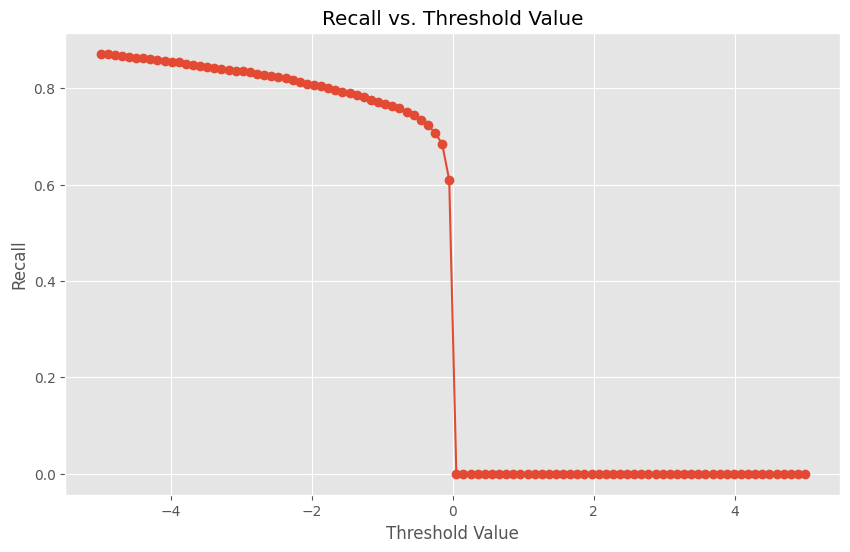

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Define a range of threshold values
thresholds = np.linspace(-5, 5, 100)  # Adjust the range as needed

# Initialize lists to store recall values
recall_values = []

# Calculate recall for each threshold value
for threshold in thresholds:
    # Create a new binary classification based on the current threshold
    y_pred_new = (decision_scores[:, 1] >= threshold).astype(int)
    
    # Calculate recall and append it to the list
    recall = recall_score(y_test, y_pred_new)
    recall_values.append(recall)

# Plot the recall values against the threshold values
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_values, marker='o', linestyle='-')
plt.xlabel("Threshold Value")
plt.ylabel("Recall")
plt.title("Recall vs. Threshold Value")
plt.grid(True)
plt.show()


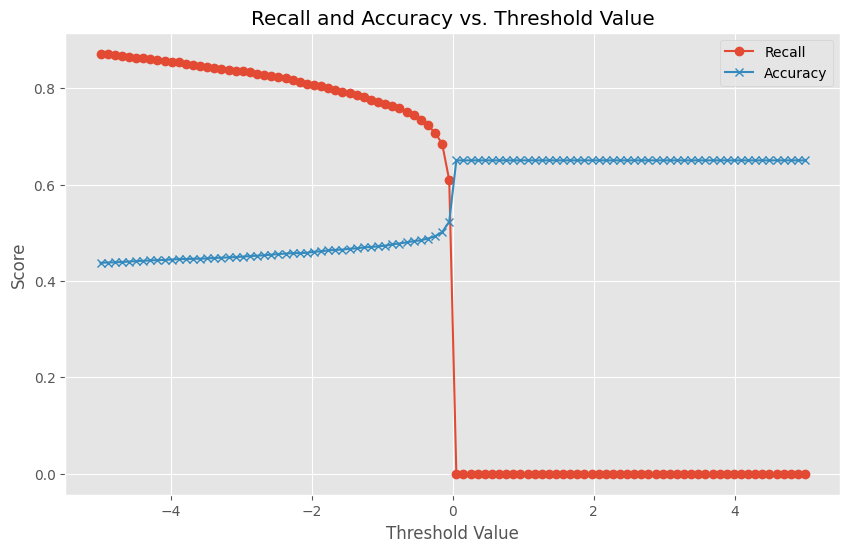

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score

thresholds = np.linspace(-5, 5, 100)  # Adjust the range as needed

recall_values = []
accuracy_values = []

for threshold in thresholds:
    y_pred_new = (decision_scores[:, 1] >= threshold).astype(int)
    
    recall = recall_score(y_test, y_pred_new)
    accuracy = accuracy_score(y_test, y_pred_new)
    
    recall_values.append(recall)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_values, marker='o', linestyle='-', label="Recall")
plt.plot(thresholds, accuracy_values, marker='x', linestyle='-', label="Accuracy")
plt.xlabel("Threshold Value")
plt.ylabel("Score")
plt.title("Recall and Accuracy vs. Threshold Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = DecisionTreeClassifier(**best_params, random_state=42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print(accuracy)
print('precision',precision_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))

from sklearn.metrics import classification_report
print('classification report on prediction of test data\n',classification_report(y_test,y_pred))